# Importing Libraries

In [ ]:
pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 50.9 MB/s eta 0:00:00


In [ ]:
pip install patchify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import rasterio
import numpy as np
from rasterio.plot import show
import matplotlib.pyplot as plt
from PIL import Image
import os
from patchify import patchify
import tifffile
import cv2

import warnings
warnings.filterwarnings("ignore")

# Data Exploration

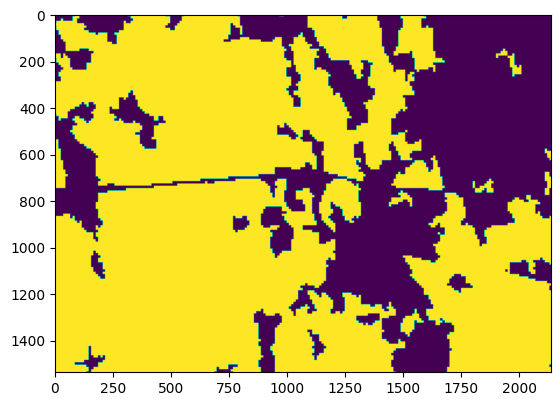

In [ ]:
plt.imshow(rasterio.open('/content/drive/MyDrive/data/ricemaps/CORINE_ricemap4.tif').read().reshape(rasterio.open('/content/drive/MyDrive/data/ricemaps/CORINE_ricemap4.tif').read().shape[1], rasterio.open('/content/drive/MyDrive/data/ricemaps/CORINE_ricemap4.tif').read().shape[2]))

(350, 471)
(471, 350)


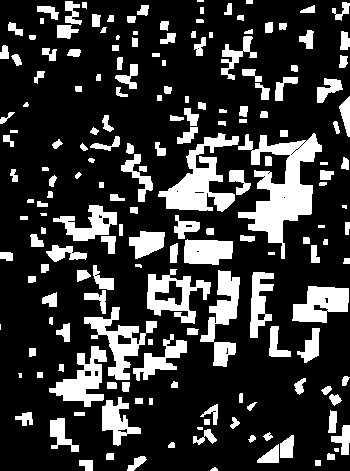

In [ ]:
fuc = Image.open('/content/drive/MyDrive/data/testdata/ricemaps/2021-05-21--2021-05-28.tiff')
print(fuc.size)
print(np.array(fuc).shape)
fuc.show()

In [ ]:
fucc = Image.open('/content/drive/MyDrive/data/testdata/tiles/sargodha_tile.tif')
print(fucc.size)
print(np.array(fucc).shape)
fucc.show()

(350, 471)
(471, 350, 3)


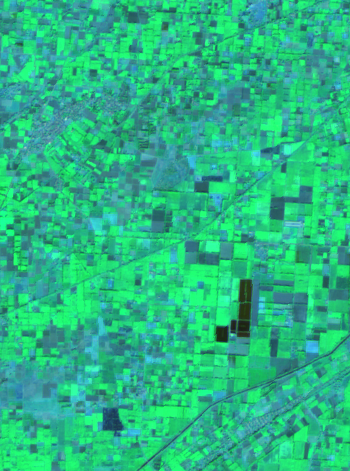

In [ ]:
fucci = Image.open('/content/drive/MyDrive/data/testdata/tiles/sargodha_tile3.tif')
print(fucci.size)
print(np.array(fucci).shape)
fucci.show()

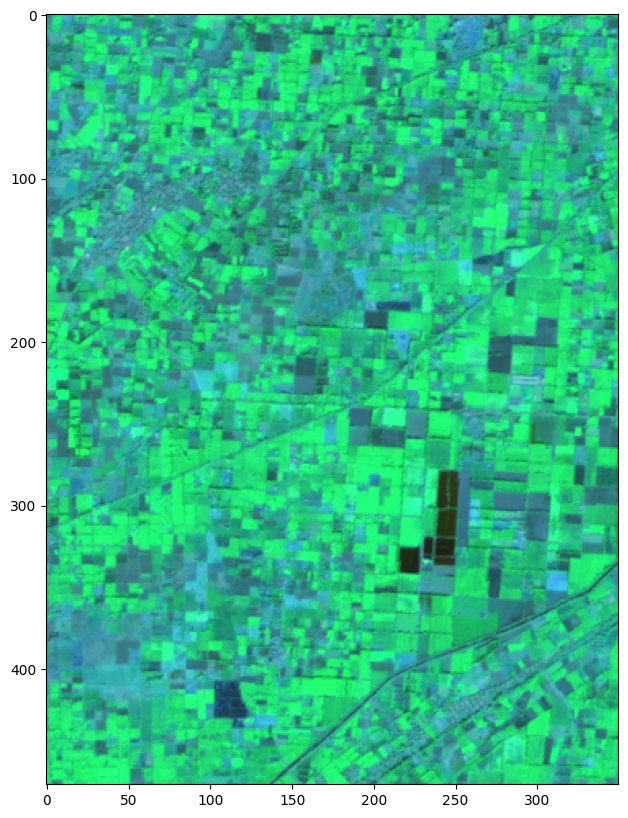

In [ ]:
figure = plt.figure(figsize=(10,10))
plt.imshow(np.array(fucci))
plt.show();

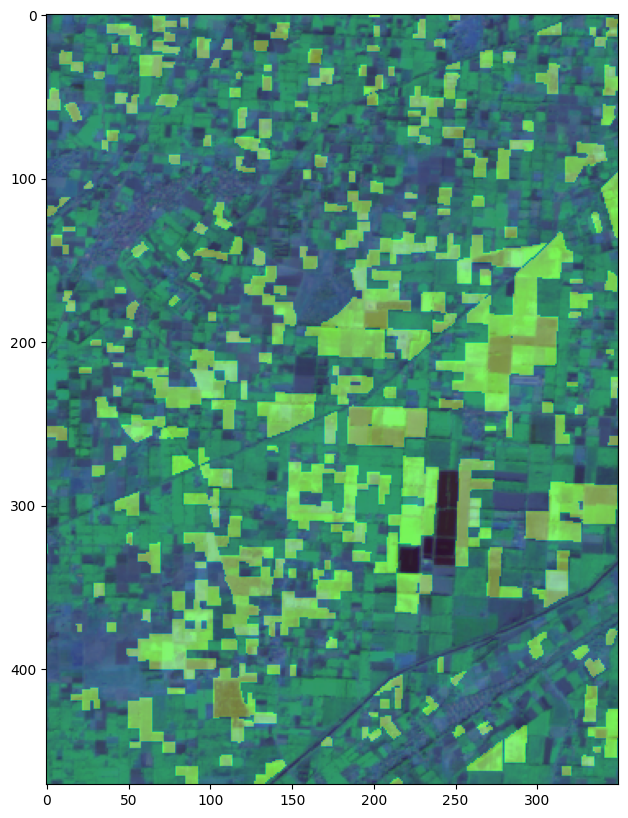

In [ ]:
figure = plt.figure(figsize=(10,10))
#plt.subplot(121)
plt.imshow(np.array(fucci))
mask = plt.imshow(np.array(fuc), alpha=0.4)
#plt.subplot(122)
#plt.imshow(np.array(fucc))
plt.show();

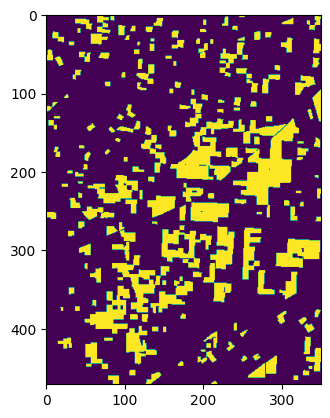

In [ ]:
fuc = np.where(np.array(fuc)==255,1,np.array(fuc))
plt.imshow(fuc)

In [ ]:
fuc.size

(1970, 1500)

In [ ]:
fuci = np.array(fuc)

In [ ]:
fuci.shape

(1500, 1970, 3)

In [ ]:
crip = tifffile.imread('/content/drive/MyDrive/newtile2.tif')[50:fuc.size[0]-100, 50:fuc.size[1]-100]
crip.shape

(1450, 1350, 3)

(1500, 1970, 3)
(1500, 1970, 1)


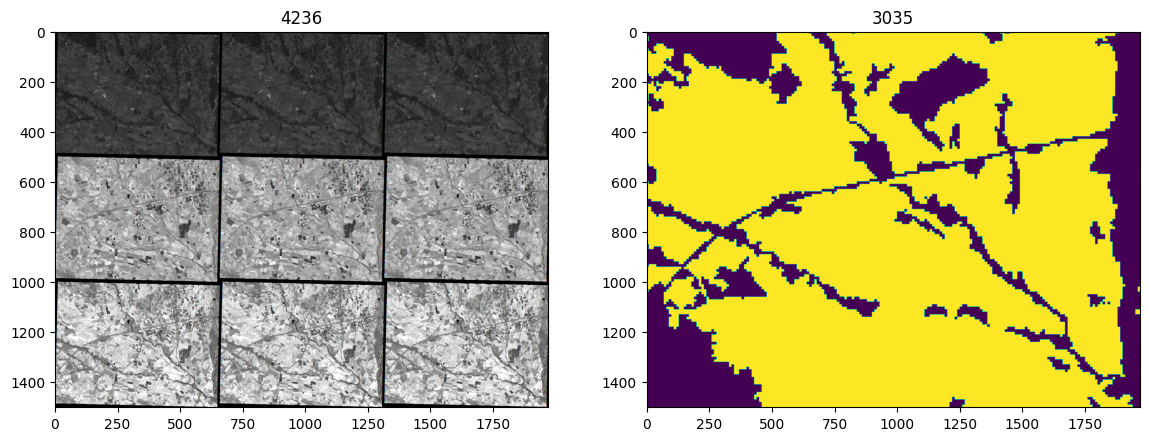

In [ ]:
pehla_map = rasterio.open('/content/drive/MyDrive/newtile2.tif')
map1 = pehla_map.read()
map1 = np.reshape(map1, (map1.shape[1], map1.shape[2], map1.shape[0]))
print(map1.shape)

dosra_map = rasterio.open('/content/drive/MyDrive/CORINE_ricemap2.tif')
map2 = dosra_map.read()
map2 = np.reshape(map2, (map2.shape[1], map2.shape[2], map2.shape[0]))
print(map2.shape)

figure = plt.figure(figsize=(14,10))
plt.subplot(121)
plt.imshow(map1)
plt.title('4236')
plt.subplot(122)
plt.imshow(map2)
plt.title('3035')
plt.show();

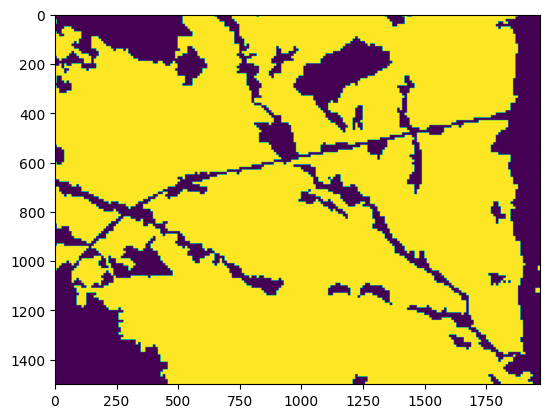

In [ ]:
new = np.squeeze(map2)
plt.imshow(new)

(1970, 1500)
(1820, 1350)


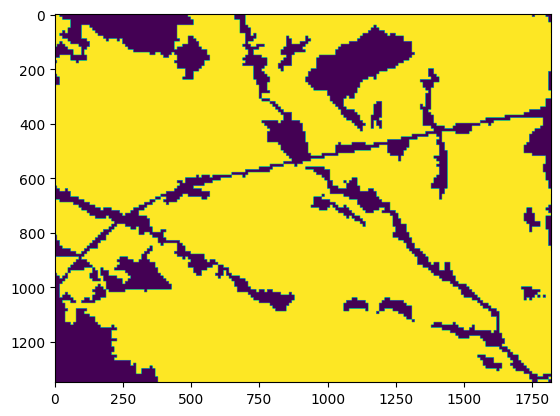

In [ ]:
nai = Image.fromarray(np.squeeze(map2.astype(np.int32)))
print(nai.size)
nai_crop = nai.crop((50,50, nai.size[0]-100, nai.size[1]-100))
print(nai_crop.size)
plt.imshow(np.array(nai_crop))

In [ ]:
croppedfuc = fuc.crop((50,50,fuc.size[0]-100, fuc.size[1]-100))
croppedfuc.size

(1820, 1350)

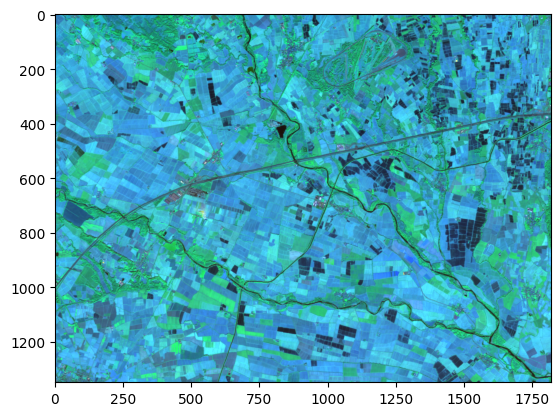

In [ ]:
plt.imshow(np.array(croppedfuc))

In [ ]:
np.array(croppedfuc)[0].shape

(1820, 3)

In [ ]:
reshape = pehla_map.reshape(-1,3)
reshape.shape

(2955000, 3)

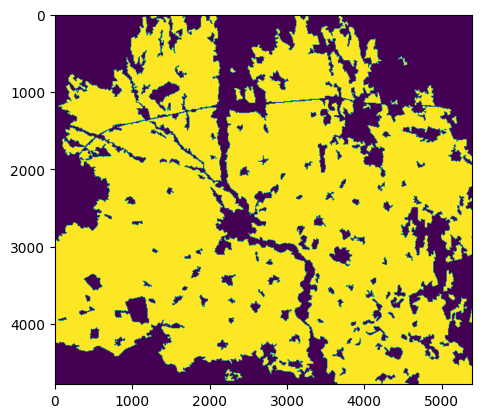

In [ ]:
plt.imshow(map2)
plt.show();

# Data Loading PipeLine

In [ ]:
path = '/content/drive/MyDrive/data/'
path_to_tiles = os.path.join(path, 'tiles')
image_files = os.listdir(path_to_tiles)
print(image_files)

['newtile7.tif', 'newtile9.tif', 'newtile6.tif', 'newtile5.tif', 'newtile2.tif', 'newtile4.tif', 'newtile3.tif', 'newtile8.tif', 'newtile1.tiff', '.ipynb_checkpoints']


In [ ]:
def tiles_preprocessing(path):
  path_to_tiles = os.path.join(path, 'tiles')
  processed_tiles = []
  image_files = os.listdir(path_to_tiles)
  image_files.remove('.ipynb_checkpoints')
  image_files = sorted(image_files)
  for image_file in image_files:
    print(f'Tile Name: {image_file}')
    tile = Image.open(os.path.join(path_to_tiles, image_file))
    print(f'Original Size: {np.array(tile).shape}')
    box = (50, 50, tile.size[0]-100, tile.size[1]-100)
    cropped = tile.crop(box)
    print(f'Cropped Size: {np.array(cropped).shape}')
    print('\n')
    processed_tiles.append(np.array(cropped))
  return processed_tiles

In [ ]:
def maps_preprocessing(path):
  path_to_maps = os.path.join(path, 'ricemaps')
  processed_maps = []
  map_files = os.listdir(path_to_maps)
  map_files.remove('.ipynb_checkpoints')
  map_files = sorted(map_files)
  for map_file in map_files:
    print(f'Map Name: {map_file}')
    mapi = rasterio.open(os.path.join(path_to_maps, map_file))
    map = mapi.read()
    map = np.reshape(map,(map.shape[1], map.shape[2], map.shape[0]))
    print(f'Original Size: {map.shape}')
    map_image = Image.fromarray(np.squeeze(map))
    box = (50,50,map_image.size[0]-100, map_image.size[1]-100)
    cropped_map = map_image.crop(box)
    print(f'Cropped Size: {np.array(cropped_map).shape}')
    print('\n')
    processed_maps.append(np.array(cropped_map))
  return processed_maps

In [ ]:
path = '/content/drive/MyDrive/data/'

In [ ]:
tiles = tiles_preprocessing(path)

Tile Name: newtile1.tiff
Original Size: (1514, 2141, 3)
Cropped Size: (1364, 1991, 3)


Tile Name: newtile8.tif
Original Size: (1618, 2098, 3)
Cropped Size: (1468, 1948, 3)




In [ ]:
maps = maps_preprocessing(path)

Map Name: CORINE_ricemap.tif
Original Size: (1514, 2141, 1)
Cropped Size: (1364, 1991)


Map Name: CORINE_ricemap8.tif
Original Size: (1618, 2098, 1)
Cropped Size: (1468, 1948)




In [ ]:
len(tiles), len(maps)

(9, 9)

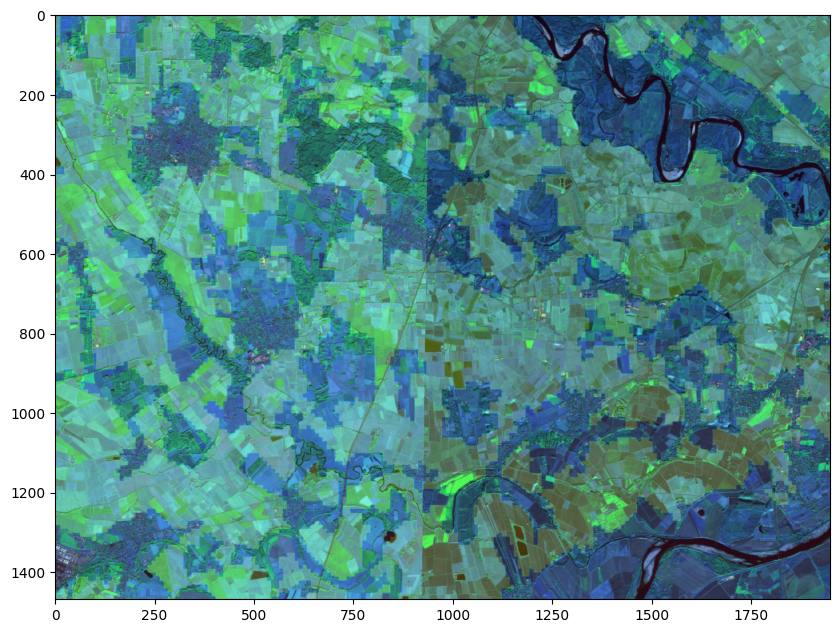

In [ ]:
import random

i = random.randint(0, len(tiles)-1)
figure = plt.figure(figsize=(10,10))
#plt.subplot(121)
plt.imshow(tiles[i])
mask = plt.imshow(maps[i], alpha=0.2)
#plt.subplot(122)
#plt.imshow(np.array(fucc))
plt.show();

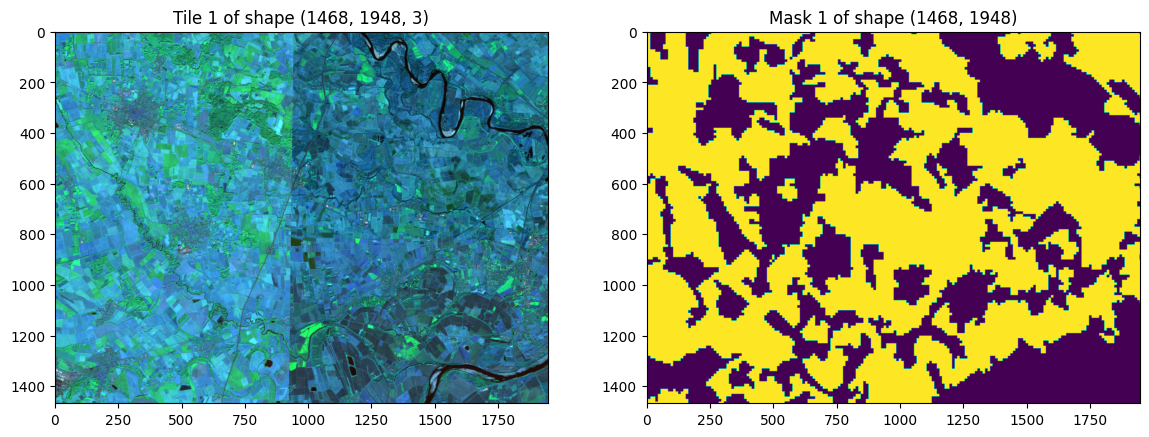

In [ ]:
import random

i = random.randint(0, len(tiles)-1)

figure = plt.figure(figsize=(14,10))
plt.subplot(121)
plt.imshow(tiles[i])
plt.title(f'Tile {i} of shape {tiles[i].shape}')
plt.subplot(122)
plt.imshow(maps[i])
plt.title(f'Mask {i} of shape {maps[i].shape}')
plt.show();

# Patchifying

In [ ]:
def patchifying(images, patch_size, step):
  patchess = []
  total_patches = 0

  for image in images:
    if len(image.shape) > 2:
      channels = image.shape[-1]
      #size_y = (image.shape[0] // patch_size) * patch_size
      #print(size_y)
      #size_x = (image.shape[1] // patch_size) * patch_size
      #print(size_x)
      #cropped_image = image[0:size_y, 0:size_x]
      #print(cropped_image.shape)
      patches = patchify(image, (patch_size, patch_size, channels), step)
      no_of_patches = patches.shape[0] * patches.shape[1]
      print(f'Number of Patches: {no_of_patches}')
      new_shape = (no_of_patches, patches.shape[3], patches.shape[4], patches.shape[5])
      patches = np.reshape(patches, new_shape)
      print(f'Shape of Patches: {patches.shape}')
      total_patches += no_of_patches
    else:
      #size_y = (image.shape[0] // patch_size) * patch_size
      #size_x = (image.shape[1] // patch_size) * patch_size
      #cropped_image = image[0:size_y, 0:size_x]
      patches = patchify(image, (patch_size, patch_size), step)
      no_of_patches = patches.shape[0] * patches.shape[1]
      print(f'Number of Patches: {no_of_patches}')
      new_shape = (no_of_patches, patches.shape[2], patches.shape[3])
      patches = np.reshape(patches, new_shape)
      print(f'Shape of Patches: {patches.shape}')
      total_patches += no_of_patches
    print(f'Total Patch Count: {total_patches}')
    print('\n')
    patchess.append(patches)
  patchess = np.concatenate(patchess)
  print(f'TUPLE OF ALL PATCHES_SHAPE: {patchess.shape}')
  return patchess

In [ ]:
tile_patches = patchifying(tiles, 32, 16)

Number of Patches: 10332
Shape of Patches: (10332, 32, 32, 3)
Total Patch Count: 10332


Number of Patches: 10800
Shape of Patches: (10800, 32, 32, 3)
Total Patch Count: 21132


TUPLE OF ALL PATCHES_SHAPE: (21132, 32, 32, 3)


In [ ]:
map_patches = patchifying(maps, 32, 16)

Number of Patches: 10332
Shape of Patches: (10332, 32, 32)
Total Patch Count: 10332


Number of Patches: 10800
Shape of Patches: (10800, 32, 32)
Total Patch Count: 21132


TUPLE OF ALL PATCHES_SHAPE: (21132, 32, 32)


In [ ]:
# patch size and step size
patch_size = 128
step = 64

# calculate the number of rows and columns to pad
num_rows_to_pad = patch_size - (np.array(fucc).shape[0] % patch_size)
num_cols_to_pad = patch_size - (np.array(fucc).shape[1] % patch_size)

# pad the image with zeros
padded_fucc = np.pad(np.array(fucc), ((num_rows_to_pad, num_rows_to_pad), (num_cols_to_pad, num_cols_to_pad), (0, 0)), 'constant')
print(padded_fucc.shape)
# calculate the number of patches in each dimension
num_patches_row = (padded_fucc.shape[0] - patch_size) // step + 1
num_patches_col = (padded_fucc.shape[1] - patch_size) // step + 1

# initialize an empty array to store the patches
patches_fucc = np.zeros((num_patches_row * num_patches_col, patch_size, patch_size, 3))

# patchify the image
index = 0
for row in range(0, padded_fucc.shape[0] - patch_size + 1, step):
    for col in range(0, padded_fucc.shape[1] - patch_size + 1, step):
        patches_fucc[index] = padded_fucc[row:row + patch_size, col:col + patch_size, :]
        index += 1
print(patches_fucc.shape)

(553, 418, 3)
(35, 128, 128, 3)


In [ ]:
patches_fucc[0].shape

(128, 128, 3)

In [ ]:
# patch size and step size
patch_size = 32
step = 16

# calculate the number of rows and columns to pad
num_rows_to_pad = patch_size - (np.array(fuc).shape[0] % patch_size)
num_cols_to_pad = patch_size - (np.array(fuc).shape[1] % patch_size)

# pad the image with zeros
padded_fuc = np.pad(np.array(fuc), ((num_rows_to_pad, num_rows_to_pad), (num_cols_to_pad, num_cols_to_pad)), 'constant')
print(padded_fuc.shape)
# calculate the number of patches in each dimension
num_patches_row = (padded_fuc.shape[0] - patch_size) // step + 1
num_patches_col = (padded_fuc.shape[1] - patch_size) // step + 1

# initialize an empty array to store the patches
patches_fuc = np.zeros((num_patches_row * num_patches_col, patch_size, patch_size))

# patchify the image
index = 0
for row in range(0, padded_fuc.shape[0] - patch_size + 1, step):
    for col in range(0, padded_fuc.shape[1] - patch_size + 1, step):
        patches_fuc[index] = padded_fuc[row:row + patch_size, col:col + patch_size]
        index += 1
print(patches_fuc.shape)

(489, 354)
(609, 32, 32)


In [ ]:
# patch size and step size
patch_size = 32
step = 16

# calculate the number of rows and columns to pad
num_rows_to_pad = patch_size - (np.array(fucci).shape[0] % patch_size)
num_cols_to_pad = patch_size - (np.array(fucci).shape[1] % patch_size)

# pad the image with zeros
padded_fucci = np.pad(np.array(fucci), ((num_rows_to_pad, num_rows_to_pad), (num_cols_to_pad, num_cols_to_pad), (0, 0)), 'constant')
print(padded_fucci.shape)
# calculate the number of patches in each dimension
num_patches_row = (padded_fucci.shape[0] - patch_size) // step + 1
num_patches_col = (padded_fucci.shape[1] - patch_size) // step + 1

# initialize an empty array to store the patches
patches_fucci = np.zeros((num_patches_row * num_patches_col, patch_size, patch_size, 3))

# patchify the image
index = 0
for row in range(0, padded_fucci.shape[0] - patch_size + 1, step):
    for col in range(0, padded_fucci.shape[1] - patch_size + 1, step):
        patches_fucci[index] = padded_fucci[row:row + patch_size, col:col + patch_size, :]
        index += 1
print(patches_fucci.shape)

(489, 354, 3)
(609, 32, 32, 3)


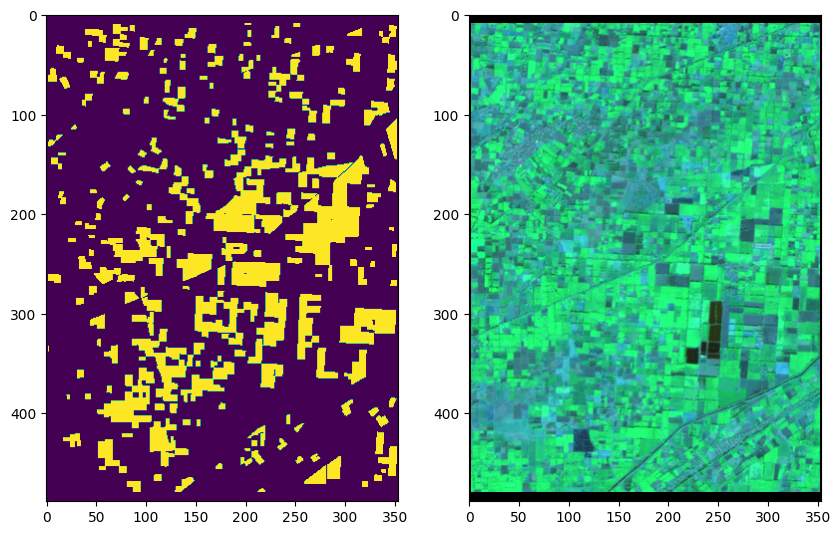

In [ ]:
figure = plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(padded_fuc)
plt.subplot(122)
plt.imshow(padded_fucci)
plt.show();

In [ ]:
normalized_patches_fucc = patches_fucc.copy() / 255.0

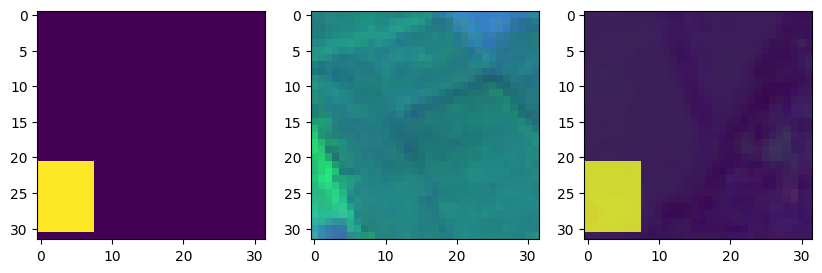

In [ ]:
import random
number = random.randint(0, map_patches.shape[0]-1)

figure = plt.figure(figsize=(10,10))
plt.subplot(131)
plt.imshow(map_patches[number])
plt.subplot(132)
plt.imshow(tile_patches[number] / 255.0)
plt.subplot(133)
plt.imshow(map_patches[number] / 255.0)
msk = plt.imshow(tile_patches[0], alpha=0.2)
plt.show();


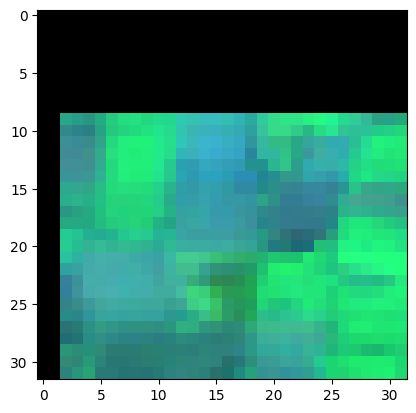

In [ ]:
plt.imshow(patches_fucci[0] / 255.0)

# Creating Data Splits

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from numpy.ma import test
train_images, other_images, train_maps, other_maps = train_test_split(tile_patches, map_patches, test_size=0.2, random_state=42, shuffle=False)
test_images, val_images, test_maps, val_maps = train_test_split(other_images, other_maps, test_size=0.5, random_state=42, shuffle=False)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(patches_fucci, patches_fuc, test_size=0.1, random_state=42, shuffle=False)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(548, 32, 32, 3)
(61, 32, 32, 3)


In [ ]:
print(train_images.shape)
print(train_maps.shape)
print(val_images.shape)
print(val_maps.shape)
print(test_images.shape)
print(test_maps.shape)

(16905, 32, 32, 3)
(16905, 32, 32)
(2114, 32, 32, 3)
(2114, 32, 32)
(2113, 32, 32, 3)
(2113, 32, 32)


In [ ]:
print(train_images.dtype)
print(train_maps.dtype)
print(val_images.dtype)
print(val_maps.dtype)
print(test_images.dtype)
print(test_maps.dtype)

uint8
uint8
uint8
uint8
uint8
uint8


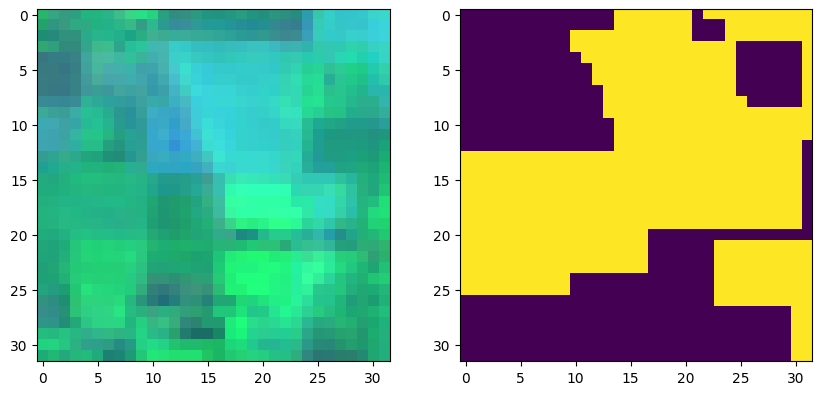

In [ ]:
import random
i = random.randint(0, X_train.shape[0]-1)

figure = plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(X_train[i] / 255.0)
plt.subplot(122)
plt.imshow(y_train[i])
plt.show();

# Model Building

In [ ]:
!pip install -U segmentation-models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 5.1 MB/s eta 0:00:00


In [ ]:
os.environ["SM_FRAMEWORK"] = "tf.keras"
import segmentation_models as sm
import tensorflow as tf
from keras import backend as K

Segmentation Models: using `tf.keras` framework.


In [ ]:
backbone = 'inceptionresnetv2'
preprocessor = sm.get_preprocessing(backbone)



## Preprocessing Data Before Feeding into the Model

In [ ]:
patches_fucc_proc = preprocessor(patches_fucc.copy())

In [ ]:
patches_fucci_proc = preprocessor(patches_fucci.copy())

In [ ]:
X_train_proc = preprocessor(X_train)
X_test_proc = preprocessor(X_test)

In [ ]:
train_images_proc = preprocessor(train_images)
val_images_proc = preprocessor(val_images)
test_images_proc = preprocessor(test_images)

In [ ]:
train_images_proc.dtype, test_images_proc.dtype, val_images_proc.dtype

(dtype('float32'), dtype('float32'), dtype('float32'))

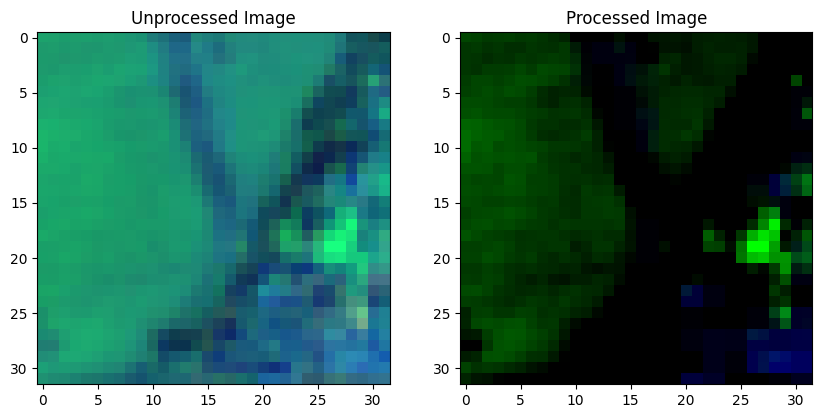

In [ ]:
figure = plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(train_images[0])
plt.title('Unprocessed Image')
plt.subplot(122)
plt.imshow(train_images_proc[0])
plt.title('Processed Image')
plt.show();

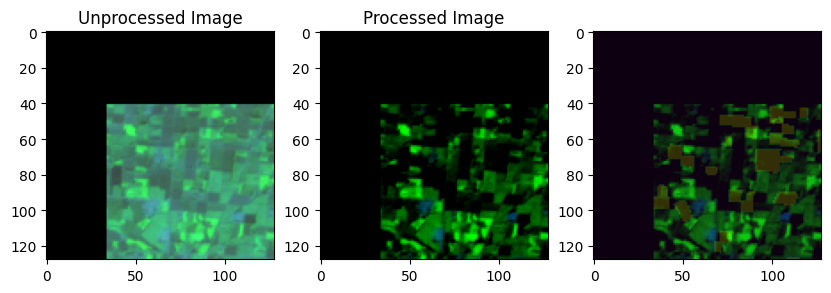

In [ ]:
figure = plt.figure(figsize=(10,10))
plt.subplot(131)
plt.imshow(patches_fucc[0] /255.0 )
plt.title('Unprocessed Image')
plt.subplot(132)
plt.imshow(patches_fucc_proc[0])
plt.title('Processed Image')
plt.subplot(133)
plt.imshow(patches_fucc_proc[0])
msk = plt.imshow(patches_fuc[0], alpha=0.2)
plt.show();

In [ ]:
train_images_proc = np.array(train_images_proc)
train_maps = np.array(train_maps)
val_images_proc = np.array(val_images_proc)
val_maps = np.array(val_maps)

In [ ]:
train_images_proc = train_images_proc.astype(np.float32)
val_images_proc = val_images_proc.astype(np.float32)
train_maps = train_maps.astype(np.float32)
val_maps = val_maps.astype(np.float32)

print(f'{train_images_proc.dtype}, {train_maps.dtype}, {val_images_proc.dtype}, {val_maps.dtype}')

float32, float32, float32, float32


In [ ]:
X_train_proc = X_train_proc.astype(np.float32)
X_test_proc = X_test_proc.astype(np.float32)

y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

In [ ]:
freq = np.bincount(train_maps.flatten(), minlength=2)
pixels = np.sum(freq)
print(f'Total Pixels: {pixels}')
vazan = pixels / (2*freq)
print(f'Weights: {vazan}')

Total Pixels: 58327040
Weights: [1.77404152 0.69622594]


In [ ]:
train_maps = train_maps.astype(np.float32)
val_maps = val_maps.astype(np.float32)
test_maps = test_maps.astype(np.float32)

In [ ]:
X_train_proc.dtype, y_test.dtype

(dtype('float64'), dtype('float64'))

In [ ]:
weights = [1.77404152, 0.69622594]

dice_loss = sm.losses.DiceLoss(class_weights = weights)

focal_loss = sm.losses.CategoricalFocalLoss()

custom_loss = dice_loss + (1 * focal_loss)

In [ ]:
def IoU(y_true, y_pred):

  th = 0.5
  y_pred = tf.cast(y_pred >= th,tf.float32)
  #y_pred = y_pred.astype(np.int34)
  y_true_flatten = K.flatten(y_true)
  y_pred_flatten = K.flatten(y_pred)
  intersection = K.sum(y_true_flatten * y_pred_flatten)
  final_coef_value = (intersection + 1.0) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value

  #intersection = tf.reduce_sum(y_true * y_pred, axis = [1,2,3])
  #union = tf.reduce_sum(y_true + y_pred, axis = [1,2,3]) - intersection

  #coef = (intersection + 1) / (union + 1)
  #return tf.reduce_mean(coef)

In [ ]:
def mean_iou(y_true, y_pred, classes=2):
  th= 0.5

  y_pred = tf.cast(y_pred>=th, tf.float32)
  iou = tf.keras.metrics.MeanIoU(num_classes=classes, sparse_y_true=True, sparse_y_pred=True)
  iou.update_state(y_true, y_pred)
  return iou.result()

In [ ]:
model = sm.Unet(backbone, encoder_weights='imagenet', activation='sigmoid')

219055592/219055592 [==============================] - 1s 0us/step


In [ ]:
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy', IoU]
              )

In [ ]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='/content/drive/MyDrive/data/saved_models',
    save_weights_only=False,
    save_freq='epoch')

## Initial training

In [ ]:
hist_big = model.fit(train_images_proc, train_maps,
                 batch_size = 64,
                 epochs=10,
                 verbose = 1,
                 validation_data = (val_images_proc, val_maps),
                 callbacks=[checkpoint_callback]
                 )

Epoch 1/10
265/265 [==============================] - ETA: 0s - loss: 0.5326 - accuracy: 0.7362 - IoU: 0.6496 

265/265 [==============================] - 3731s 14s/step - loss: 0.5326 - accuracy: 0.7362 - IoU: 0.6496 - val_loss: 0.8558 - val_accuracy: 0.6262 - val_IoU: 0.5110
Epoch 2/10
265/265 [==============================] - ETA: 0s - loss: 0.4977 - accuracy: 0.7568 - IoU: 0.6675 

265/265 [==============================] - 3742s 14s/step - loss: 0.4977 - accuracy: 0.7568 - IoU: 0.6675 - val_loss: 0.8637 - val_accuracy: 0.6616 - val_IoU: 0.5291
Epoch 3/10
139/265 [==============>...............] - ETA: 28:32 - loss: 0.4600 - accuracy: 0.7826 - IoU: 0.6945

KeyboardInterrupt: ignored

In [ ]:
model.save('/content/drive/MyDrive/IncepResV2_BD2.h5')

In [ ]:
val_preds = model.predict(val_images_proc)
#val_preds[0]

14/14 [==============================] - 2s 131ms/step


In [ ]:
th = 0.5
val_preds = np.where(val_preds>=th, 1,0)

In [ ]:
jaccard_coef(val_maps, val_preds.astype(np.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=0.91613877>

In [ ]:
classes = 2
IOU = tf.keras.metrics.MeanIoU(num_classes=classes, sparse_y_true=True, sparse_y_pred=False)
IOU.update_state(val_maps, val_preds)
print(IOU.result().numpy())

0.15084222


In [ ]:
test_preds = model.predict(test_images_proc)

67/67 [==============================] - 54s 613ms/step


In [ ]:
threshold = 0.5
test_preds = np.where(test_preds >= threshold, 1,0)

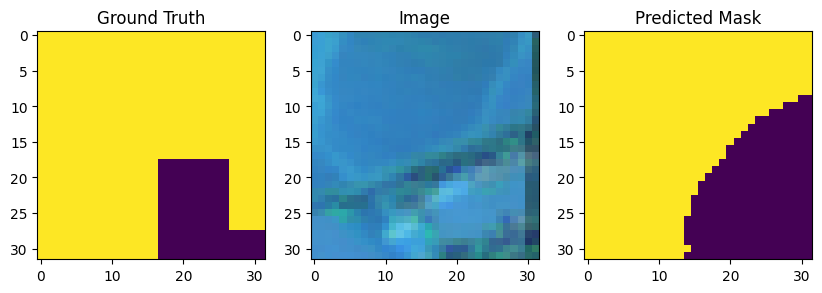

In [ ]:
import random
test_img_number = random.randint(0, test_preds.shape[0])

figure = plt.figure(figsize=(10,10))
plt.subplot(131)
plt.imshow(test_maps[test_img_number])
plt.title('Ground Truth')
plt.subplot(132)
plt.imshow(test_images[test_img_number])
plt.title('Image')
plt.subplot(133)
plt.imshow(test_preds[test_img_number])
plt.title('Predicted Mask')
plt.show();

In [ ]:
print(IoU(test_maps, test_preds))

tf.Tensor(0.63247937, shape=(), dtype=float32)


### Testing Data Jaccard Coefficient

In [ ]:
import tensorflow as tf
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/IncepResV2_BD.h5', custom_objects={'jaccard_coef':jaccard_coef})
predictions = loaded_model.predict(train_images_proc)

14/14 [==============================] - 5s 101ms/step


In [ ]:
threshold = 0.5
predictions = np.where(predictions >= threshold, 1,0)
print(predictions[0])

In [ ]:
test_jaccard_coef = jaccard_coef(y_true= test_maps, y_pred = predictions.astype(np.float32))
print(test_jaccard_coef)

tf.Tensor(0.9322857, shape=(), dtype=float32)


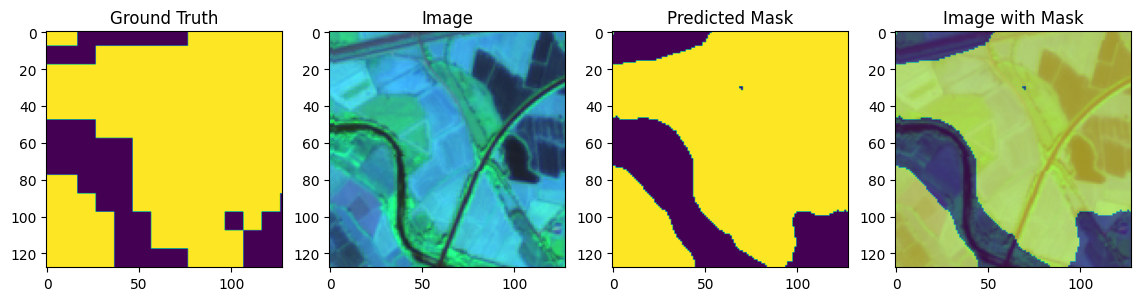

In [ ]:
import random
test_img_number = random.randint(0, predictions.shape[0]-1)

figure = plt.figure(figsize=(14,10))
plt.subplot(141)
plt.imshow(test_maps[test_img_number])
plt.title('Ground Truth')
plt.subplot(142)
plt.imshow(test_images[test_img_number])
plt.title('Image')
plt.subplot(143)
plt.imshow(predictions[test_img_number])
plt.title('Predicted Mask')
plt.subplot(144)
plt.imshow(test_images[test_img_number])
msk = plt.imshow(predictions[test_img_number], alpha=0.6)
plt.title('Image with Mask')
plt.show();


## Further training

In [ ]:
hist = model.fit(train_images_proc, train_maps,
                 batch_size = 16,
                 epochs=10,
                 verbose = 1,
                 validation_data = (val_images_proc, val_maps)
                 )

Epoch 1/10
33/33 [==============================] - 117s 346ms/step - loss: 0.1190 - accuracy: 0.8762 - jaccard_coef: 0.7090 - val_loss: 1.3727 - val_accuracy: 0.6007 - val_jaccard_coef: 0.2437
Epoch 2/10
33/33 [==============================] - 7s 212ms/step - loss: 0.1094 - accuracy: 0.8898 - jaccard_coef: 0.7210 - val_loss: 1.8921 - val_accuracy: 0.5230 - val_jaccard_coef: 0.1321
Epoch 3/10
33/33 [==============================] - 7s 217ms/step - loss: 0.1025 - accuracy: 0.8928 - jaccard_coef: 0.7311 - val_loss: 0.5890 - val_accuracy: 0.6694 - val_jaccard_coef: 0.3853
Epoch 4/10
33/33 [==============================] - 7s 214ms/step - loss: 0.1065 - accuracy: 0.8917 - jaccard_coef: 0.7302 - val_loss: 0.2421 - val_accuracy: 0.8283 - val_jaccard_coef: 0.6078
Epoch 5/10
33/33 [==============================] - 7s 213ms/step - loss: 0.0872 - accuracy: 0.9068 - jaccard_coef: 0.7576 - val_loss: 0.2083 - val_accuracy: 0.8597 - val_jaccard_coef: 0.6354
Epoch 6/10
33/33 [====================

In [ ]:
train_preds = model.predict(train_images_proc)

17/17 [==============================] - 7s 87ms/step


In [ ]:
train_preds[0]

array([[[4.7836222e-02],
        [8.2766460e-03],
        [5.7952935e-03],
        ...,
        [7.0255338e-03],
        [2.5838634e-02],
        [9.1187038e-02]],

       [[8.1522223e-03],
        [1.1960993e-03],
        [9.9167309e-04],
        ...,
        [2.0680998e-03],
        [7.9903379e-03],
        [4.6155915e-02]],

       [[4.4746310e-03],
        [8.2597579e-04],
        [9.7851083e-04],
        ...,
        [1.4975850e-03],
        [3.9025189e-03],
        [2.3574069e-02]],

       ...,

       [[9.9968672e-01],
        [9.9999666e-01],
        [9.9999869e-01],
        ...,
        [1.0673733e-02],
        [1.3530869e-02],
        [3.5576697e-02]],

       [[9.9883229e-01],
        [9.9997365e-01],
        [9.9999011e-01],
        ...,
        [1.3856701e-02],
        [1.9360995e-02],
        [5.0744653e-02]],

       [[9.8392063e-01],
        [9.9839216e-01],
        [9.9922669e-01],
        ...,
        [3.0172477e-02],
        [4.4627506e-02],
        [1.1091177e-01]]

In [ ]:
threshold = 0.5
train_preds = np.where(train_preds >= threshold, 1,0)
print(train_preds[0])

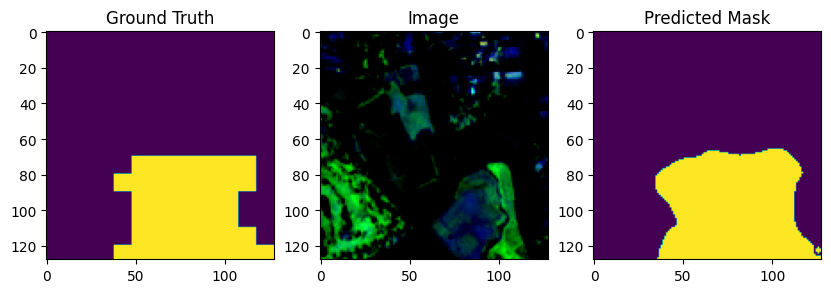

In [ ]:
import random
test_img_number = random.randint(0, train_preds.shape[0])

figure = plt.figure(figsize=(10,10))
plt.subplot(131)
plt.imshow(train_maps[test_img_number])
plt.title('Ground Truth')
plt.subplot(132)
plt.imshow(train_images_proc[test_img_number])
plt.title('Image')
plt.subplot(133)
plt.imshow(train_preds[test_img_number])
plt.title('Predicted Mask')
plt.show();

In [ ]:
val_preds = model.predict(val_images_proc)

threshold = 0.5
val_preds = np.where(val_preds >= threshold, 1,0)

print(val_preds.shape)

5/5 [==============================] - 1s 116ms/step
(131, 128, 128, 1)


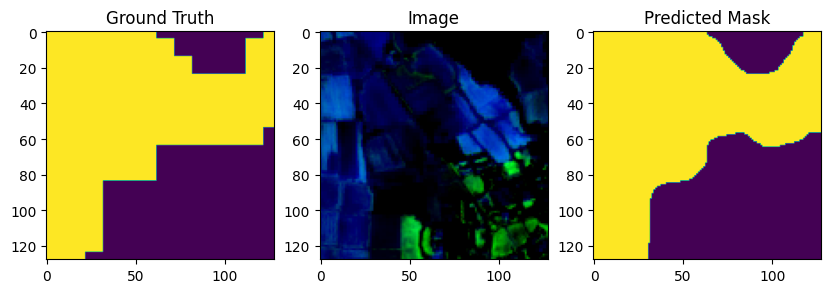

In [ ]:
import random
test_img_number = random.randint(0, val_preds.shape[0])

figure = plt.figure(figsize=(10,10))
plt.subplot(131)
plt.imshow(val_maps[test_img_number])
plt.title('Ground Truth')
plt.subplot(132)
plt.imshow(val_images_proc[test_img_number])
plt.title('Image')
plt.subplot(133)
plt.imshow(val_preds[test_img_number])
plt.title('Predicted Mask')
plt.show();

In [ ]:
model.save('/content/drive/MyDrive/IncepResV2.h5')

# Testing on Sargodha data

In [ ]:
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/IncepResV2_BD2.h5', custom_objects={'IoU': IoU})

In [ ]:
pak_preds = loaded_model.predict(X_train_proc)

18/18 [==============================] - 15s 506ms/step


In [ ]:
th = 0.5
pak_preds = np.where(pak_preds>=th, 1,0)

In [ ]:
pak_preds.shape

(548, 32, 32, 1)

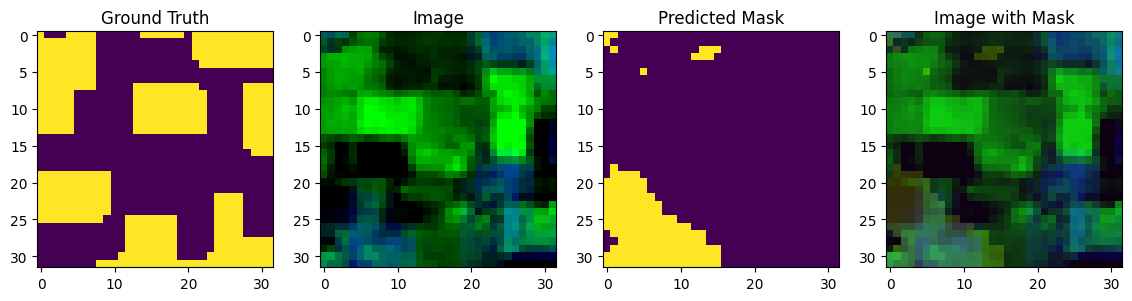

In [ ]:
import random
test_img_number = random.randint(0, pak_preds.shape[0]-1)

figure = plt.figure(figsize=(14,10))
plt.subplot(141)
plt.imshow(y_train[test_img_number])
plt.title('Ground Truth')
plt.subplot(142)
plt.imshow(X_train_proc[test_img_number])
plt.title('Image')
plt.subplot(143)
plt.imshow(pak_preds[test_img_number])
plt.title('Predicted Mask')
plt.subplot(144)
plt.imshow(X_train_proc[test_img_number])
msk = plt.imshow(pak_preds[test_img_number], alpha=0.2)
plt.title('Image with Mask')
plt.show();

In [ ]:
print(IoU(y_train, pak_preds))

tf.Tensor(0.1584919, shape=(), dtype=float32)


In [ ]:
classes = 2
IOU = tf.keras.metrics.MeanIoU(num_classes=classes, sparse_y_true=True, sparse_y_pred=True)
IOU.update_state(patches_fuc, pak_preds)
print(f'MeanIoU: {IOU.result().numpy()}')

MeanIoU: 0.35651206970214844


## Further Training

In [ ]:
loaded_model_for_training = tf.keras.models.load_model('/content/drive/MyDrive/IncepResV2_BD2.h5',
                                                       custom_objects={'IoU':IoU},
                                                       )

In [ ]:
new_hist = loaded_model.fit(patches_fucc_proc, patches_fuc,
                            batch_size=5,
                            epochs=50,
                            verbose=1)

Epoch 1/50
7/7 [==============================] - 75s 5s/step - loss: 2.0327 - accuracy: 0.3080 - jaccard_coef: 0.2163
Epoch 2/50
7/7 [==============================] - 30s 4s/step - loss: 0.6911 - accuracy: 0.6224 - jaccard_coef: 0.2920
Epoch 3/50
7/7 [==============================] - 30s 4s/step - loss: 0.4485 - accuracy: 0.7724 - jaccard_coef: 0.3150
Epoch 4/50
7/7 [==============================] - 30s 4s/step - loss: 0.4368 - accuracy: 0.7826 - jaccard_coef: 0.1519
Epoch 5/50
7/7 [==============================] - 30s 4s/step - loss: 0.4124 - accuracy: 0.7877 - jaccard_coef: 0.0459
Epoch 6/50
7/7 [==============================] - 30s 4s/step - loss: 0.3982 - accuracy: 0.7889 - jaccard_coef: 0.0207
Epoch 7/50
7/7 [==============================] - 31s 4s/step - loss: 0.3869 - accuracy: 0.7894 - jaccard_coef: 0.0343
Epoch 8/50
7/7 [==============================] - 30s 4s/step - loss: 0.3813 - accuracy: 0.8005 - jaccard_coef: 0.1601
Epoch 9/50
7/7 [==============================] 

In [ ]:
preds_after_train = loaded_model(patches_fucc_proc)
#th=0.5
#preds_after_train = np.where(preds_after_train>=th,1,0)

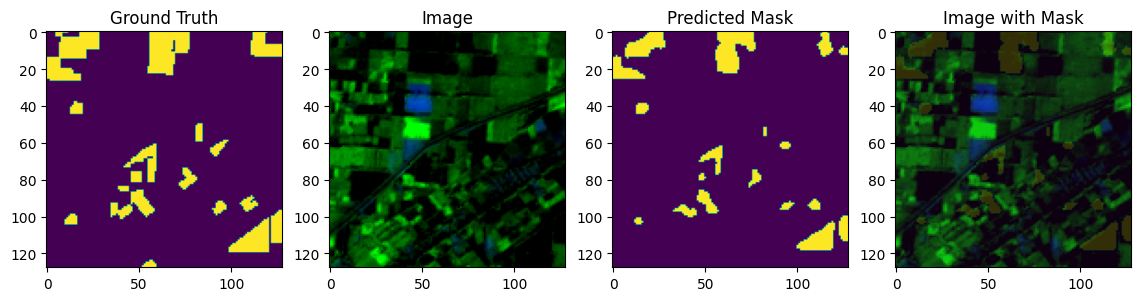

In [ ]:
import random
test_img_number = random.randint(0, preds_after_train.shape[0]-1)

figure = plt.figure(figsize=(14,10))
plt.subplot(141)
plt.imshow(patches_fuc[test_img_number])
plt.title('Ground Truth')
plt.subplot(142)
plt.imshow(patches_fucc_proc[test_img_number])
plt.title('Image')
plt.subplot(143)
plt.imshow(preds_after_train[test_img_number])
plt.title('Predicted Mask')
plt.subplot(144)
plt.imshow(patches_fucc_proc[test_img_number])
msk = plt.imshow(preds_after_train[test_img_number], alpha=0.2)
plt.title('Image with Mask')
plt.show();

# Finetuning for better results

In [ ]:
#new_input_shape = (32, 32, 3)
#new_input = tf.keras.layers.Input(shape=new_input_shape)
#loaded_model_for_training.layers[0].batch_input_shape = new_input_shape
#loaded_model_for_training.layers[0].build(new_input.shape)

new_output_layer = tf.keras.layers.Activation(activation='sigmoid', name='final_act')(loaded_model_for_training.layers[-2].output)
fine_tuned_model = tf.keras.models.Model(inputs=loaded_model_for_training.input, outputs=new_output_layer)

for layer in fine_tuned_model.layers[:-150]:
    layer.trainable = False

fine_tuned_model.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy', IoU]
)

In [ ]:
fine_tuned_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)                     32)                                                         

In [ ]:
hist_fine = fine_tuned_model.fit(X_train_proc,
                     y_train,
                     epochs=100,
                     verbose=1,
                     batch_size=32)

Epoch 1/100
18/18 [==============================] - 91s 4s/step - loss: 0.7448 - accuracy: 0.5822 - IoU: 0.2131
Epoch 2/100
18/18 [==============================] - 65s 4s/step - loss: 0.5179 - accuracy: 0.7579 - IoU: 0.0642
Epoch 3/100
18/18 [==============================] - 64s 4s/step - loss: 0.4823 - accuracy: 0.7703 - IoU: 0.0244
Epoch 4/100
18/18 [==============================] - 66s 4s/step - loss: 0.4615 - accuracy: 0.7777 - IoU: 0.1629
Epoch 5/100
18/18 [==============================] - 65s 4s/step - loss: 0.4435 - accuracy: 0.7929 - IoU: 0.2555
Epoch 6/100
18/18 [==============================] - 66s 4s/step - loss: 0.4275 - accuracy: 0.8037 - IoU: 0.3163
Epoch 7/100
18/18 [==============================] - 66s 4s/step - loss: 0.4201 - accuracy: 0.8079 - IoU: 0.3426
Epoch 8/100
18/18 [==============================] - 66s 4s/step - loss: 0.4004 - accuracy: 0.8189 - IoU: 0.3978
Epoch 9/100
18/18 [==============================] - 67s 4s/step - loss: 0.3862 - accuracy: 0.82

In [ ]:
trained_preds = fine_tuned_model.predict(X_test_proc)

2/2 [==============================] - 9s 474ms/step


In [ ]:
trained_preds = np.where(trained_preds>=0.5,1,0)

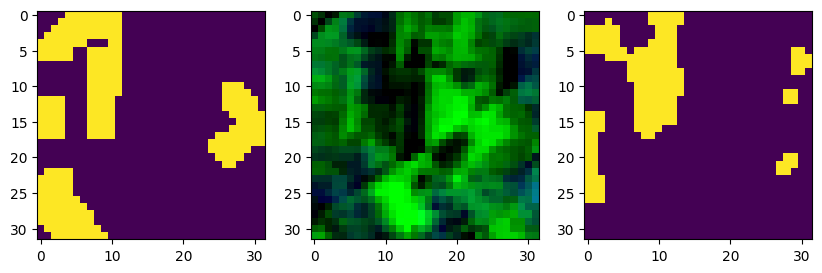

In [ ]:
i = random.randint(0, trained_preds.shape[0]-1)
figure = plt.figure(figsize=(10,10))
plt.subplot(131)
plt.imshow(y_test[i])
plt.subplot(132)
plt.imshow(X_test_proc[i])
plt.subplot(133)
plt.imshow(trained_preds[i])

In [ ]:
print(IoU(y_test, trained_preds))

tf.Tensor(0.2621951, shape=(), dtype=float32)
